In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,8

# $\{ x^2 + y^2 + z^2 = 1 \} \cap \mathbb{Q}^3  $ 

In [117]:
# Rational points on the sphere... 
# not the same as solutions to n   = a^2 + b^2 + c^2
# instead...                   n^2 = a^2 + b^2 + c^2

In [124]:
a = lambda ((m,n,p,q)) : m**2 + n**2 - p**2 - q**2
b = lambda ((m,n,p,q)) : 2*(m*q + n*p)
c = lambda ((m,n,p,q)) : 2*(n*q - m*p)
d = lambda ((m,n,p,q)) : m**2 + n**2 + p**2 + q**2

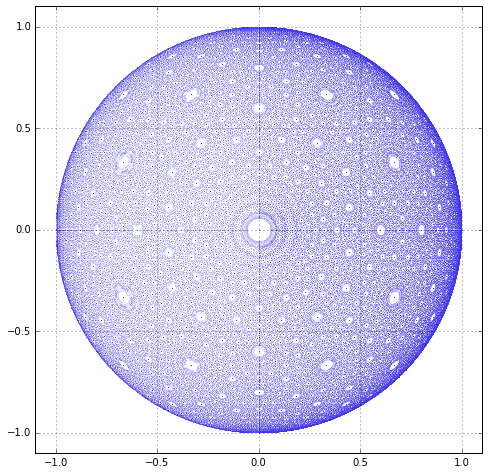

In [141]:
# https://mathoverflow.net/questions/125224/rational-points-on-a-sphere-in-mathbbrd
#
# http://www.numdam.org/item/JTNB_2003__15_1_319_0
# 
# https://math.stackexchange.com/questions/914152/how-to-mark-rational-points-on-a-sphere

N  =  25
ht =   N**2

X = [ (m,n,p,q) 
      for m in range(N) for n in range(N) for p in range(N) for q in range(N) 
      if  m**2 + n**2 + p**2 + q**2 < ht ]
X = X[1:]

A = np.array([ a(x) for x in X ])
B = np.array([ b(x) for x in X ])
C = np.array([ c(x) for x in X ])
D = np.array([ d(x) for x in X ])

# https://color.adobe.com/

for (x,y) in [(A,B),(B,A),(A,C),(C,A),(B,C),(C,A)]:
    
    plt.plot( x*1.0/D ,  1.0*y/D , '.' , color = "#4136EB" , markersize = 0.05 )
    plt.plot( x*1.0/D , -1.0*y/D , '.' , color = "#4136EB" , markersize = 0.05 )



plt.xlim([ -1.1 , 1.1 ])
plt.ylim([ -1.1 , 1.1 ])
plt.grid(True)

# Rational Points  $\mathbb{Q}^2 \subseteq \mathbb{R}^2$ 

In [120]:
#https://stackoverflow.com/questions/11175131/code-for-greatest-common-divisor-in-python

def gcd(a, b):
    """Calculate the Greatest Common Divisor of a and b.

    Unless b==0, the result will have the same sign as b (so that when
    b is divided by it, the result comes out positive).
    """
    while b:
        a, b = b, a%b
    return a

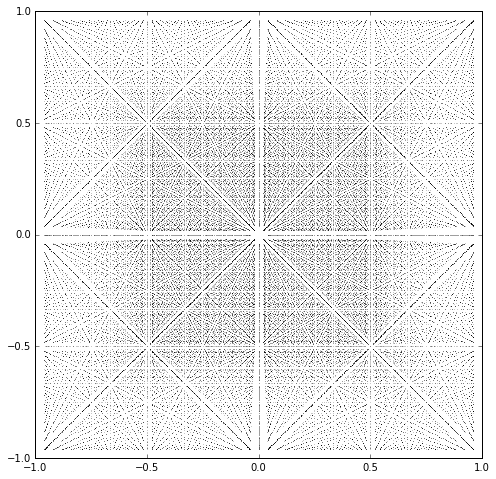

In [145]:
A = np.arange(N)
B = 1 + np.arange(N)

Q = [ (a,b) for a in A for b in B if ( gcd(a,b) == 1 ) ] 

X = [ (a,c,b*d/gcd(b,d)) for (a,b) in Q for (c,d) in Q ] 
X = np.array(X)

ht = 50
mask = ( np.max( X, axis=1) < ht ) & ( X[::,0] < X[::,2] )  & ( X[::,1] < X[::,2] )

X    = X[mask][1:]

x = X[::,0]*1.0/X[::,2]
y = X[::,1]*1.0/X[::,2]

for s,t in [(1,1),(1,-1),(-1,1),(-1,-1)] :
    
    plt.plot(s*x, t*y, 'k.' , markersize = 0.25 )